# 수익성 분석

## 데이터 불러오기, 전처리, EDA

### 데이터
- 역별 데이터
- 2016년 ~ 2022년 10월
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 일평균(원) : 역별 일평균 운수 수익

In [88]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [89]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

In [90]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [91]:
df = pd.read_csv("./2016~2022_일평균 승하차,운수수익.csv", encoding="euc-kr")
df

,역사명,연도,일평균 승하차,일평균 운수수익
0,가야,2016,7289.0,2579454
1,감전,2016,7626.0,3395089
2,강서구청,2016,5600.0,2717454
3,개금,2016,16331.0,6317217
4,거제,2016,9650.0,4150958
...,...,...,...,...
688,충렬사,2022,5719.0,1056843
689,토성,2022,15118.0,5678334
690,하단,2022,32746.0,10415912
691,해운대,2022,23072.0,8352193


### 결측치 채워넣기

In [92]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     6
일평균 운수수익    0
dtype: int64

In [93]:
df = df.fillna(0)
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [94]:
df.iloc[124]["일평균 승하차"]

11170.0

In [95]:
# 다대포해수욕장은 증가/감소 추세가 섞여 있어서 2017년 값을 대입
df.iat[25,2] = 11170.0
df.iat[25,2]

11170.0

낫개, 다대포항, 동매, 신장림, 장림역은 증가 추세가 보이므로 가격 차이만큼 역산하여 넣기

In [96]:
# 낫개역
df.iat[21,2] = 9122
df.iat[21,2]

9122.0

In [97]:
# 다대포항
df.iat[24,2] = 6886
df.iat[24,2]

6886.0

In [98]:
# 동매
df.iat[34,2] = 5434
df.iat[34,2]

5434.0

In [99]:
# 신장림
df.iat[74,2] = 5725
df.iat[74,2]

5725.0

In [100]:
# 장림
df.iat[82,2] = 4590
df.iat[82,2]

4590.0

In [101]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   역사명       693 non-null    object 
 1   연도        693 non-null    int64  
 2   일평균 승하차   693 non-null    float64
 3   일평균 운수수익  693 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.8+ KB


In [103]:
df['일평균 승하차'] = df[['일평균 승하차']].astype(int)

### 산점도

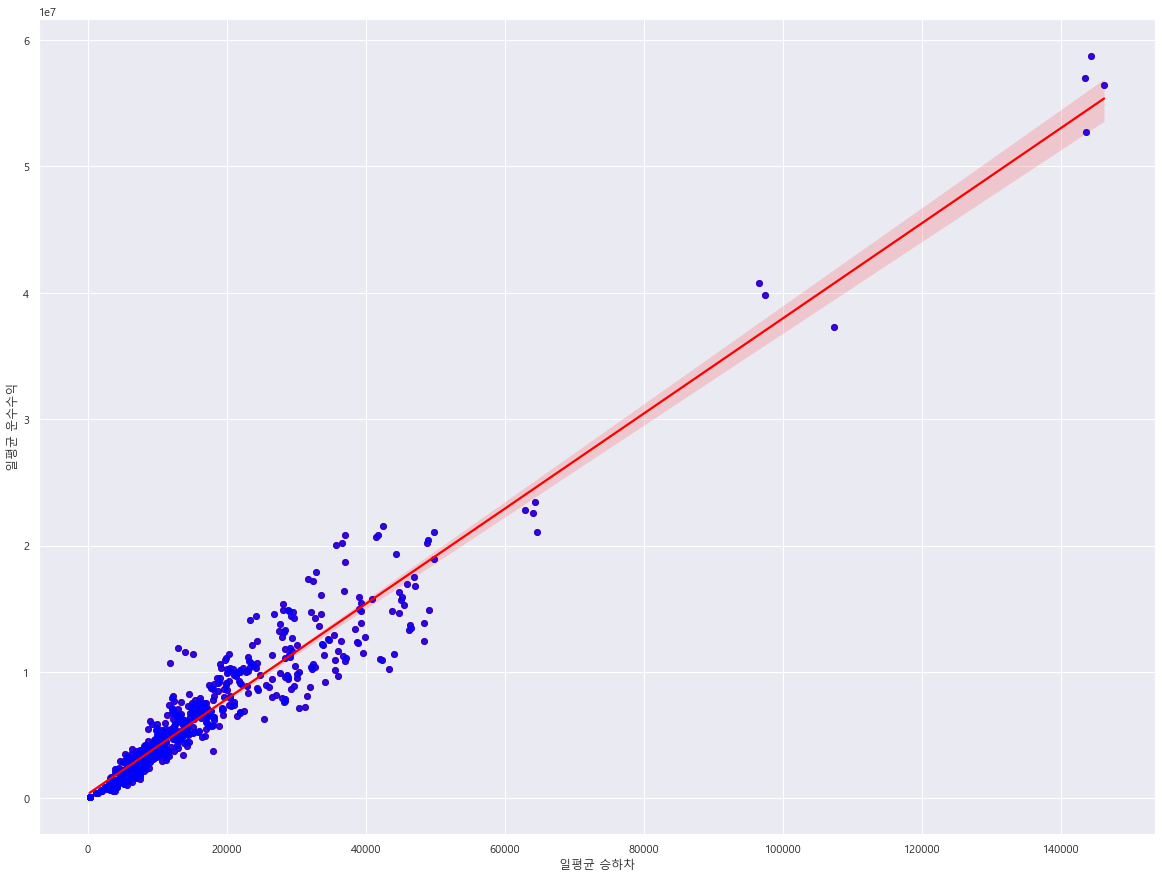

In [111]:
plt.figure(figsize=(20,15))
sns.regplot(x='일평균 승하차', y='일평균 운수수익', data=df, color="red")
plt.scatter(df[['일평균 승하차']], df[['일평균 운수수익']], alpha=0.8, color='blue')
plt.show()

### 데이터
- 역별 데이터
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 1인 가구수, 2인 가구수
- 환승 : 환승역 1
- 면적(m**2)
- 레벨 데이터 : 1부터 10까지 레벨
- 일평균(원) : 역별 일평균 운수 수익